In [70]:
import numpy as np
import math
from scipy import stats
from bisect import bisect_left
from matplotlib import pyplot as plt

In [62]:
def finite_defference_call(r,vol,T,K,smax,M,N,S):
    delta_t = T/M
    delta_S = smax/N
    f = np.zeros((N+1,M+1))
    #満期のオプション価格
    for i in range(N+1):
        f[i,M] = max((i)*delta_S - K, 0)
    #境界条件
    for i in range (M-1,-1,-1):
        f[0,i] = 0
        f[N,i] = smax - np.exp(-r*(T-delta_t*i))*K
        for j in range(1,N,1):
            a =( r*(j) + (vol*(j))**2)*delta_t/2
            b = 1 - ( (vol*(j))**2 + r )*delta_t
            c =(- r*(j) + (vol*(j))**2)*delta_t/2
            f[j,i] = a* f[j+1,i+1] + b* f[j,i+1] + c* f[j-1,i+1]
    
    S_0_vector = np.zeros(N+1)
    for i in range(N+1):
        S_0_vector[i] = i*delta_S 
    number = bisect_left(S_0_vector, S)
    return(f[number,0])

In [65]:
finite_defference_call(0.1,0.2,1,60,300,5000,300,62)

9.462484576919225

In [ ]:
def blackscholes(t,s_0,K,vol,r,q,c):#tは満期までの長さ,s_0は初期の株価、Kは行使価格、qは配当、rはリスクフリーレート、c＝１でcall
    d_1=(np.log(s_0/K)+(r-q+vol ** 2/2)*t)/vol*t**(1/2)
    d_2=d_1-vol*t**(1/2)
    call=s_0*math.exp(-q*t)*stats.norm.cdf(d_1)-K*math.exp(-r*t)*stats.norm.cdf(d_2)
    put=-s_0*math.exp(-q*t)*stats.norm.cdf(-d_1)+ K*math.exp(-r*t)*stats.norm.cdf(-d_2)
    if c ==1:
        return(call)
    else:
        return(put)

In [64]:
blackscholes(1,62,60,0.2,0.1,0,1)


9.466351504972607

安定性条件の確認

/var/folders/yr/b1_5b16s0tb5h77q9g058sq80000gn/T/ipykernel_72690/1165582622.py:16: RuntimeWarning: overflow encountered in double_scalars
  f[j,i] = a* f[j+1,i+1] + b* f[j,i+1] + c* f[j-1,i+1]
/var/folders/yr/b1_5b16s0tb5h77q9g058sq80000gn/T/ipykernel_72690/1165582622.py:16: RuntimeWarning: invalid value encountered in double_scalars
  f[j,i] = a* f[j+1,i+1] + b* f[j,i+1] + c* f[j-1,i+1]


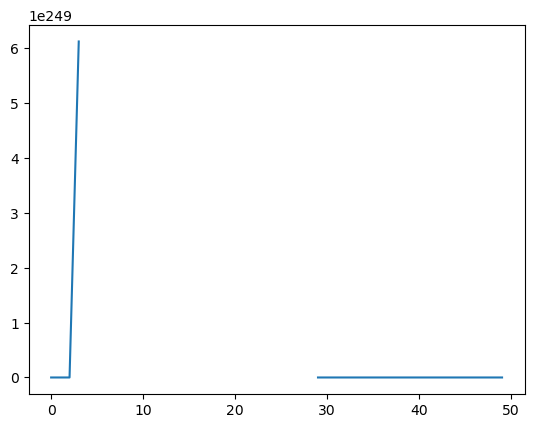

In [71]:
y_1 = []
for i in range(50):
    y_1.append(finite_defference_call(0.1,0.2,1,60,300,(i+1)*100,300,62))
plt.plot(range(50),y_1)

In [72]:
y_1

[-2.6374854019168093e+49,
 -5.155649465197648e+103,
 -2.5111129110620075e+169,
 6.1233769187612406e+249,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -5.647029339875406e+170,
 7.930854721970195e+114,
 -8.911067549707039e+57,
 21.90166378924706,
 9.46255062084325,
 9.462544724039525,
 9.462539154840794,
 9.462533886683401,
 9.462528895801183,
 9.462524160864852,
 9.462519662678085,
 9.462515383918033,
 9.46251130891041,
 9.462507423440949,
 9.46250371458431,
 9.4625001705687,
 9.46249678064167,
 9.462493534969031,
 9.462490424533812,
 9.462487441056455,
 9.462484576919225]